In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

### Data Loading and Exploration

In [16]:
# Loading Dataset
url = "https://github.com/FlipRoboTechnologies/ML_-Datasets/raw/main/HR%20Analytics/ibm-hr-analytics-employee-attrition-performance.zip"
df = pd.read_csv(url, compression='zip')
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [17]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


This Dataset Contain 1470 rows and 35 columns. Considering Attrition as our Target Varible this turns out to be a Classification Problem.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are no missing values and this dataset contain both numerical and categorical columns.

In [19]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [20]:
# Checking columns which contain single value

columns_with_single_value = {}
for column in df.columns:
    if df[column].nunique() == 1:
        columns_with_single_value[column] = df[column].unique().tolist()

print("Columns with a single unique value:")
for column, value in columns_with_single_value.items():
    print(f"{column}: {value}")

Columns with a single unique value:
EmployeeCount: [1]
Over18: ['Y']
StandardHours: [80]


In [21]:
col_to_drop = ['EmployeeCount', 'Over18', 'StandardHours']
df.drop(columns=col_to_drop, inplace=True)

In [22]:
df.shape

(1470, 32)

Now the Dataset contain 1470 rows and 32 columns.

### Data Visulization

#### Univariate Analysis

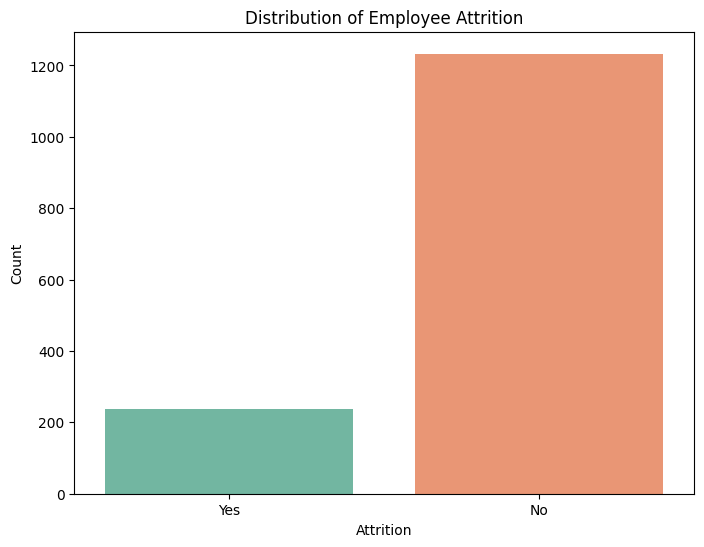

In [23]:
# Creating a count plot for the "Attrition" variable
plt.figure(figsize=(8, 6))
sns.countplot(x="Attrition", data=df, palette="Set2")
plt.title("Distribution of Employee Attrition")
plt.xlabel("Attrition")
plt.ylabel("Count")

plt.show()

Value of No is too high than yes, this could become a proble we will treat it later.

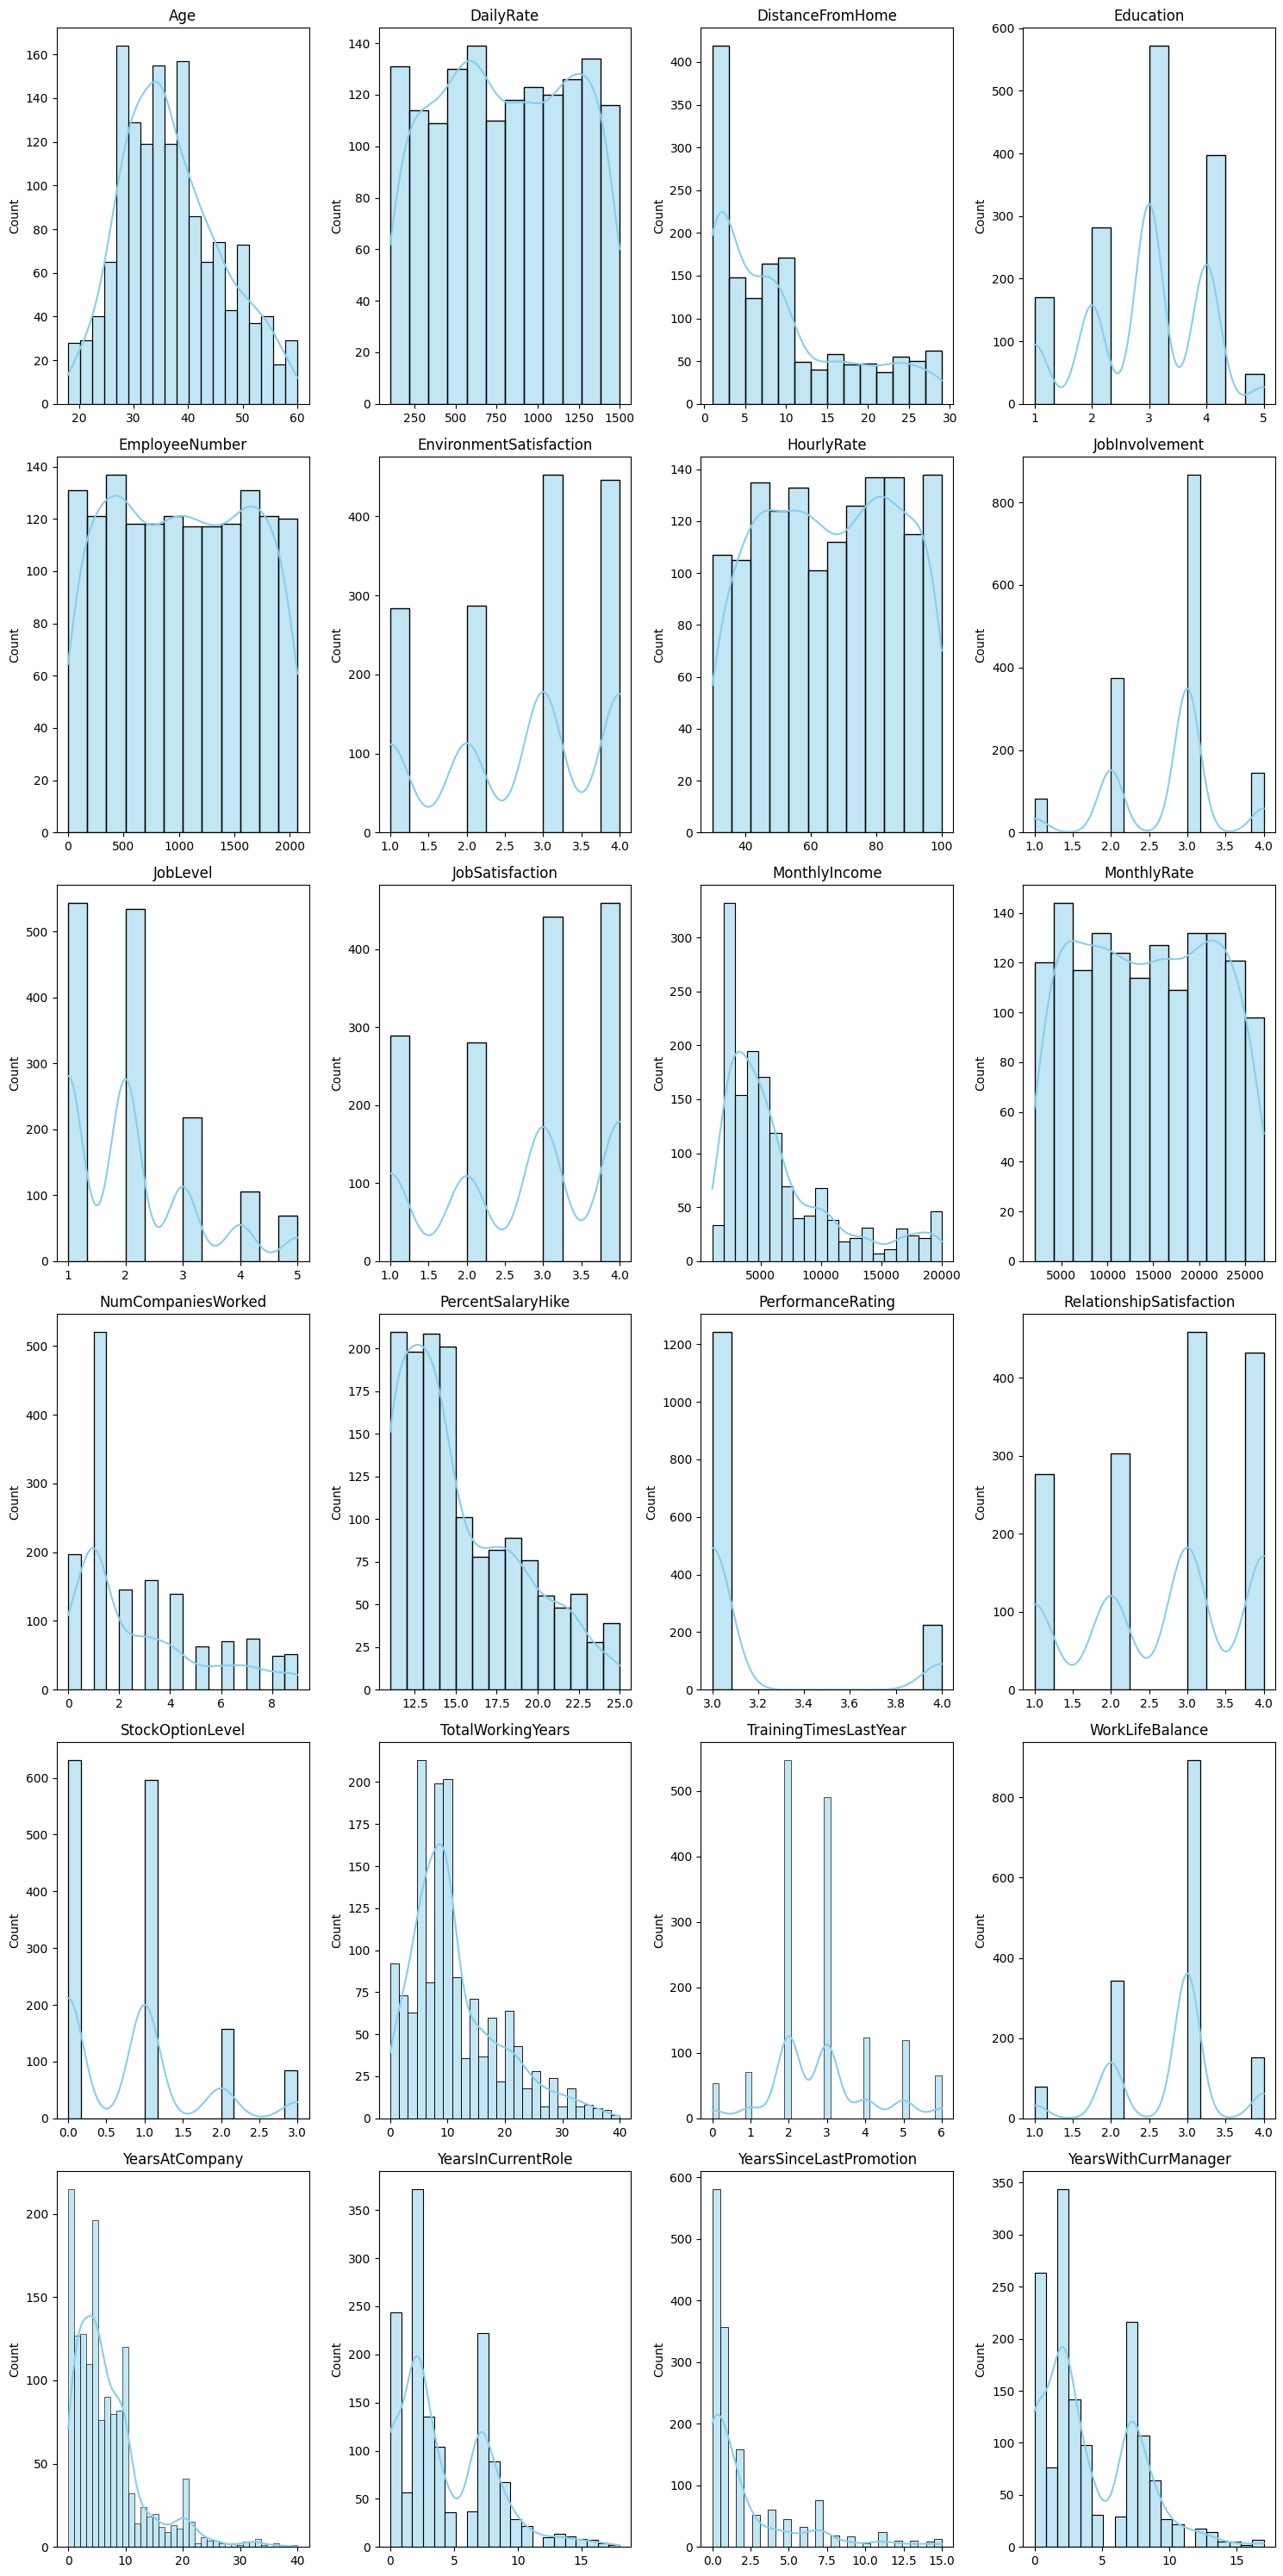

In [24]:
import math
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows and columns for subplots
num_cols = 4
num_rows = math.ceil(len(numerical_columns) / num_cols)

# Plot histograms for numerical columns
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(column)
    plt.xlabel('')
plt.tight_layout()
plt.show()

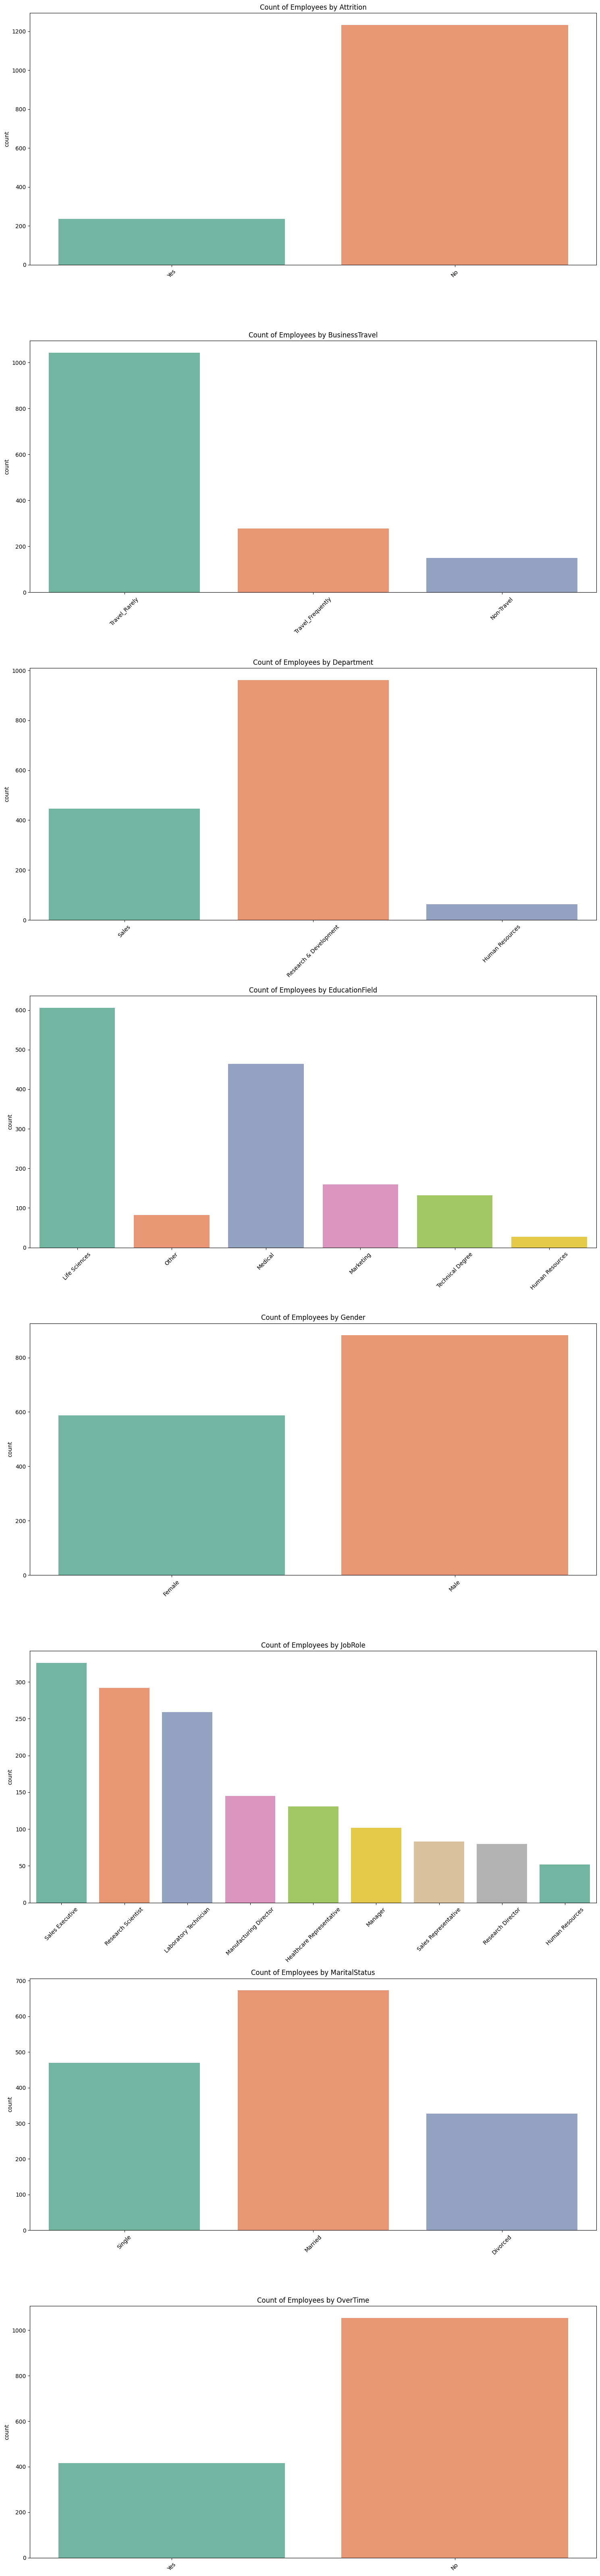

In [25]:
# Selecting categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Plotting count plots for categorical columns
plt.figure(figsize=(15, 8 * len(categorical_columns)))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)
    sns.countplot(x=column, data=df, palette="Set2")
    plt.title(f"Count of Employees by {column}")
    plt.xlabel('')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### BiVariate Analysis

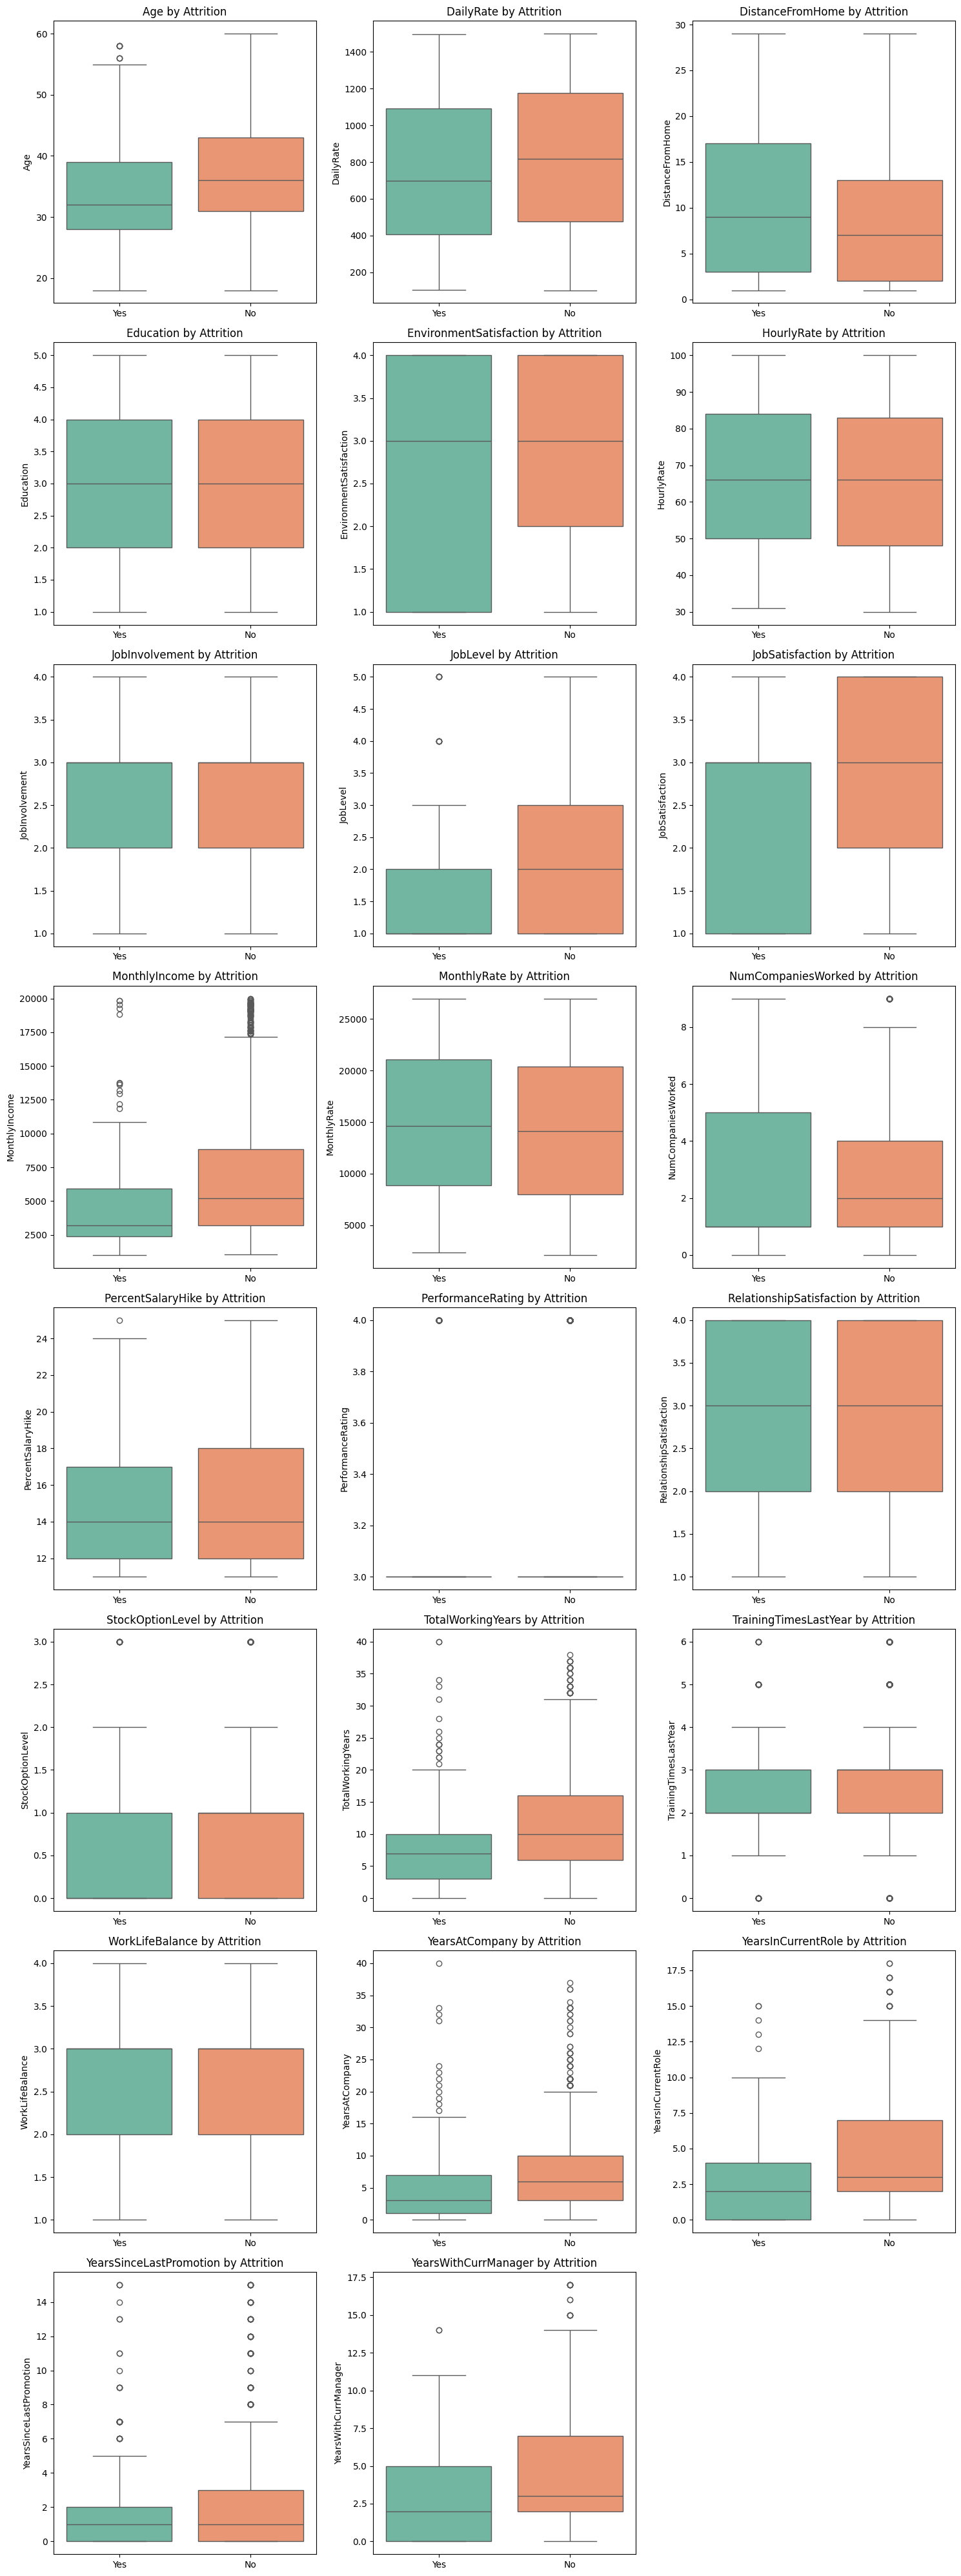

In [26]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Dropping EmployeeNumber from the numerical columns as it is just an identifier
numerical_columns = numerical_columns.drop(['EmployeeNumber'])

# Plotting box plots for numerical columns grouped by attrition status
plt.figure(figsize=(15, 5 * math.ceil(len(numerical_columns) / 3)))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(math.ceil(len(numerical_columns) / 3), 3, i)
    sns.boxplot(x='Attrition', y=column, data=df, palette="Set2")
    plt.title(f"{column} by Attrition")
    plt.xlabel('')
plt.tight_layout()
plt.show()

In [27]:
#Dropping EmployeeNumber from the dataset as it is just an identifier
df.drop('EmployeeNumber', axis=1, inplace=True)

### Correlation

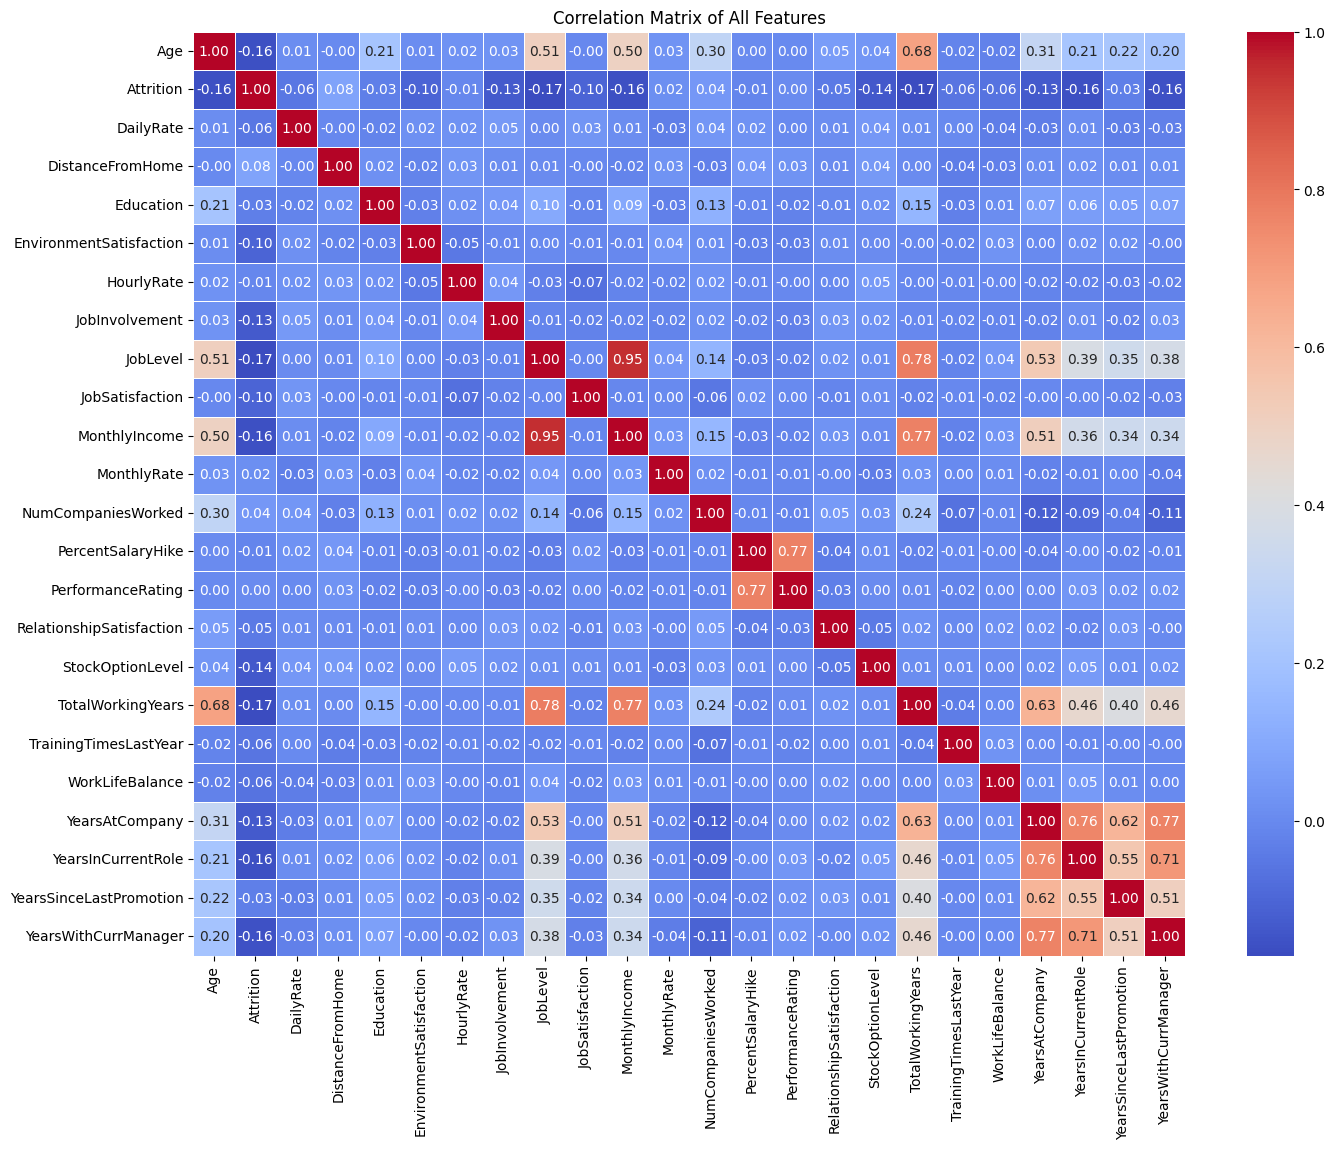

In [28]:
# Converting 'Attrition' column to numerical for correlation analysis
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix of All Features")
plt.show()

In [29]:
df.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,-0.103481,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


#### Removing Highly correlated columns

In [30]:
# Setting the threshold for high correlation
threshold = 0.8

# Finding pairs of highly correlated features
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            highly_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

print("Highly correlated pairs of features:")
for pair in highly_correlated_pairs:
    print(pair)

# Removing one feature from each pair of highly correlated features
features_to_remove = set()
for pair in highly_correlated_pairs:
    features_to_remove.add(pair[0])

# Dropping the features
df.drop(columns=features_to_remove, inplace=True)

print("\nRemoved features:")
print(features_to_remove)

# Verifying the remaining columns
print("\nRemaining columns in the DataFrame:")
print(df.columns)


Highly correlated pairs of features:
('MonthlyIncome', 'JobLevel')

Removed features:
{'MonthlyIncome'}

Remaining columns in the DataFrame:
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


### Encoding Categorical Columns

In [31]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=['object']).columns

label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in label_encoders:
    df[col] = label_encoders[col].fit_transform(df[col])

print(df.head())

   Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2               1                        2       0  ...   
1          1               1                        3       1  ...   
2          2               4                        4       1  ...   
3          4               1                        4       0  ...   
4          1               3                        1       1  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                      

In [32]:
df.dtypes

Age                         int64
Attrition                   int64
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrM

We Have successfully encoded all the columns.

### Skewness Detection and Treatment

In [33]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
Y

In [34]:
y = df['Attrition'] 

In [35]:
df=df.drop(columns=['Attrition'])  

In [36]:
from scipy.stats import boxcox

# Defining a threshold for skewness
skew_threshold = 0.5

for column in df.columns:
    if df[column].dtype != 'object':
        if abs(df[column].skew()) > skew_threshold:
            df[column] = boxcox(df[column] + 1)[0]  


In [37]:
df.skew()

Age                         0.413286
BusinessTravel             -0.970506
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome           -0.007468
Education                  -0.289681
EducationField             -0.008386
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.103624
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyRate                 0.018578
NumCompaniesWorked          0.014814
OverTime                    0.964489
PercentSalaryHike           0.116250
PerformanceRating           0.000000
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.087019
TotalWorkingYears          -0.010653
TrainingTimesLastYear       0.058058
WorkLifeBalance            -0.012286
YearsAtCompany             -0.008683
YearsInCurrentRole         -0.060849
Y

We have successfuly removed the skewness.

### Outliers Detection

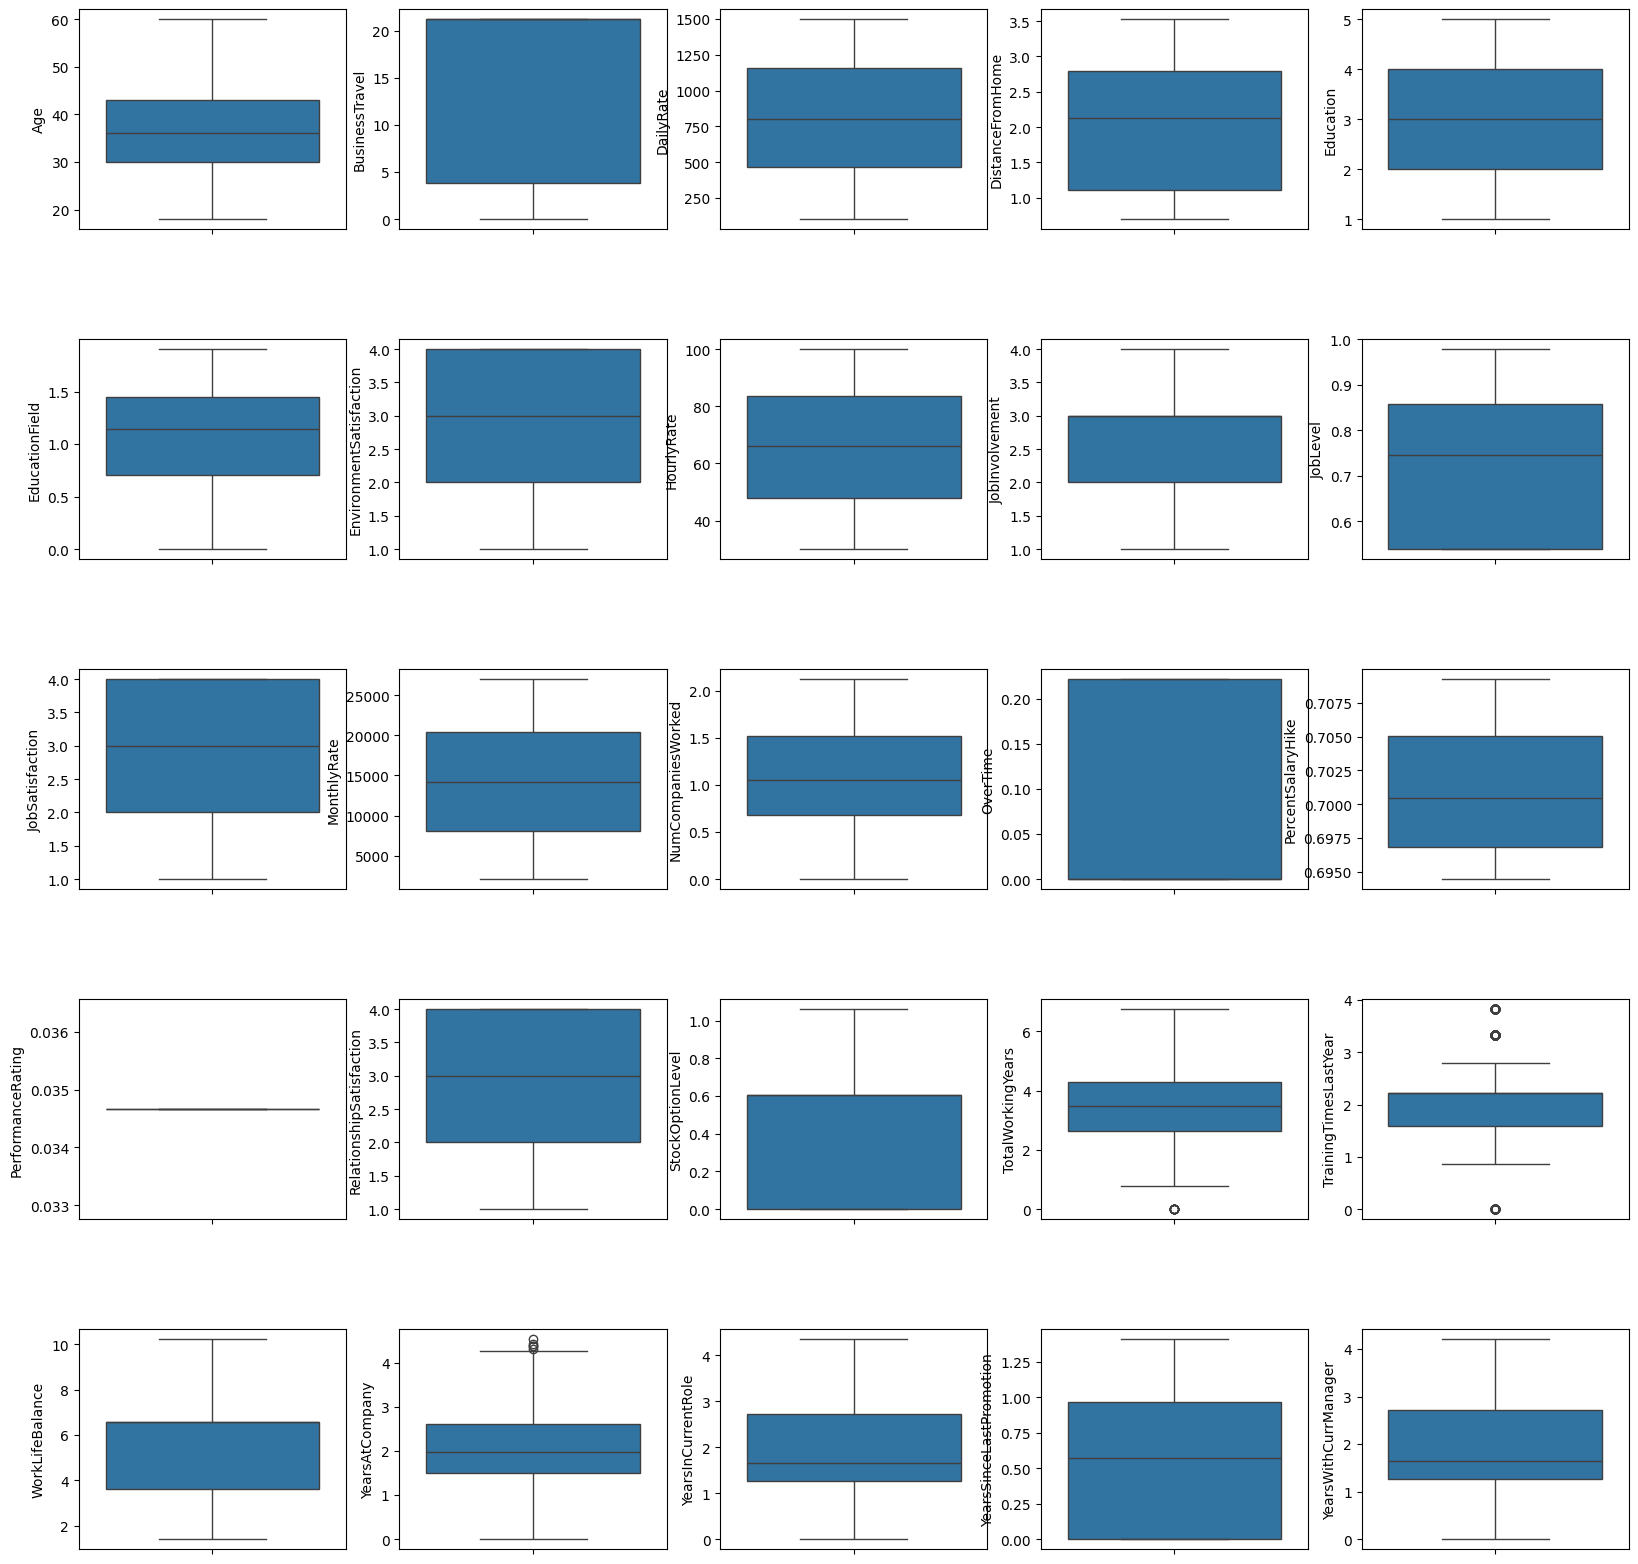

In [38]:
# Selecting numerical columns
numerical_columns = df.select_dtypes(include=['int64','float64']).columns

# Calculating the number of rows and columns for subplots
num_rows = (len(numerical_columns) - 1) // 5 + 1  
num_cols = min(len(numerical_columns), 5)  

# Setting up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 4 * num_rows))
fig.subplots_adjust(hspace=0.5)  
# Plotting boxplots for each numerical column
for i, column in enumerate(numerical_columns):
    sns.boxplot(data=df, y=column, ax=axes[i // num_cols, i % num_cols])  
# Removing empty subplots
for j in range(len(numerical_columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

plt.show()


Features such as Training time last year , years at company , total working years have presence of outliers.

In [39]:
X = df

### Feature Scaling 

In [40]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale numerical features in X
X_scaled = scaler.fit_transform(X)

# Display the scaled features
print(X_scaled)

[[0.54761905 1.         0.71581961 ... 0.4553291  0.         0.53483528]
 [0.73809524 0.18276109 0.12670007 ... 0.62672869 0.40787739 0.64479778]
 [0.45238095 1.         0.90980673 ... 0.         0.         0.        ]
 ...
 [0.21428571 1.         0.03793844 ... 0.29052909 0.         0.39245718]
 [0.73809524 0.18276109 0.65926986 ... 0.575967   0.         0.69210667]
 [0.38095238 1.         0.37652112 ... 0.38074365 0.40787739 0.29969254]]


### Handling Imbalanced Data

In [41]:
# Checking unique values of our target
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [42]:
from imblearn.over_sampling import SMOTE

In [43]:
# Balancing Class distribution
sm=SMOTE()
x,y=sm.fit_resample(X_scaled,y)

In [44]:
y.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

### Split the Data into Training and Testing Sets

In [45]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


### Importing Classification Algorithms

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

### Training the Model

In [47]:
# Initializing models
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svc = SVC()

# Training the models
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svc.fit(X_train, y_train)

SVC()

### Making Predictions

In [48]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_svc = svc.predict(X_test)

### Evaluating Model Performance

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Defining a function to evaluate the models
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    return accuracy, precision, recall, f1, roc_auc

# Evaluating each model
metrics_dict = {}
models = [log_reg, decision_tree, random_forest, svc]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    metrics_dict[name] = evaluate_model(y_test, y_pred)

# Printing the evaluation metrics
for name, metrics in metrics_dict.items():
    print(f"{name}:")
    print(f"Accuracy: {metrics[0]}")
    print(f"Precision: {metrics[1]}")
    print(f"Recall: {metrics[2]}")
    print(f"F1 Score: {metrics[3]}")
    print(f"ROC AUC Score: {metrics[4]}")
    print()


Logistic Regression:
Accuracy: 0.7732793522267206
Precision: 0.7578125
Recall: 0.7950819672131147
F1 Score: 0.776
ROC AUC Score: 0.7735409836065573

Decision Tree:
Accuracy: 0.8502024291497976
Precision: 0.83203125
Recall: 0.8729508196721312
F1 Score: 0.8520000000000001
ROC AUC Score: 0.8504754098360656

Random Forest:
Accuracy: 0.937246963562753
Precision: 0.961038961038961
Recall: 0.9098360655737705
F1 Score: 0.9347368421052632
ROC AUC Score: 0.9369180327868852

SVM:
Accuracy: 0.8866396761133604
Precision: 0.8700787401574803
Recall: 0.9057377049180327
F1 Score: 0.8875502008032128
ROC AUC Score: 0.8868688524590163



#### Random Forest id the best Performing Model .

### Saving the best Model

In [51]:
import joblib
from joblib import dump

# Saving the trained Random Forest model
dump(random_forest, 'random_forest_model.joblib')

['random_forest_model.joblib']